In [1]:
# install all tools and dependencies
import os
import pathlib
import sys

!apt install -y time build-essential
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        netgen \
                        openroad \
                        yosys \
                        klayout 
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        svgutils ngspice

!python -m pip install pyyaml click gdstk --no-binary gdstk



Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
The following NEW packages will be installed:
  time
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 26.2 kB of archives.
After this operation, 79.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 time amd64 1.7-25.1build1 [26.2 kB]
Fetched 26.2 kB in 0s (121 kB/s)
Selecting previously unselected package time.
(Reading database ... 128215 files and directories currently installed.)
Preparing to unpack .../time_1.7-25.1build1_amd64.deb ...
Unpacking time (1.7-25.1build1) ...
Setting up time (1.7-25.1build1) ...
Processing triggers for man-db (2.9.1-1) ...
bin/micromamba
env: CONDA_PREFIX=/content/conda-env
/bin/bash: /content/conda-env/conda-meta/pinned: No such file or directory

                                           __
          __  ______ ___  __

In [2]:
%cd /content
!git clone https://github.com/pramitpal/msvsd32bitsram.git
!cp /content/msvsd32bitsram/week4/PLL-gen /content/OpenFASOC/openfasoc/generators/ -r

/content
Cloning into 'msvsd32bitsram'...
remote: Enumerating objects: 542, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 542 (delta 118), reused 398 (delta 79), pack-reused 105
Receiving objects: 100% (542/542), 3.18 MiB | 15.51 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [ ]:
PATH = os.environ['PATH']
# clone OpenFASOC repo
!git clone https://github.com/idea-fasoc/OpenFASOC
# setup env
OPENFASOC_ROOT=str(pathlib.Path('OpenFASOC').resolve())
PLL_ROOT=OPENFASOC_ROOT+"/openfasoc/generators/PLL-gen/"
!cp OpenFASOC/openfasoc/generators/PLL-gen/blocks/sky130hd/gds/CP.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/generators/PLL-gen/blocks/sky130hd/gds/VCO.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/common/platforms/sky130hd/gds/sky130_fd_sc_hd.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/common/platforms/sky130hd/fill.json OpenFASOC/docs/source/notebooks/aux_files

%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env OPENFASOC_ROOT={OPENFASOC_ROOT}
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin:{OPENFASOC_ROOT}:{OPENFASOC_ROOT}/openfasoc/generators/PLL-gen/tools
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env LD_LIBRARY_PATH={LD_LIBRARY_PATH}:{CONDA_PREFIX}/lib/python3.7

In [11]:
### just clean
!cd /content/OpenFASOC/openfasoc/generators/PLL-gen/ && make clean

rm -f search_result.csv
rm -rf work
rm -rf tools/*.pyc tools/__pycache__/
cd flow && make clean_all
make[1]: Entering directory '/content/OpenFASOC/openfasoc/generators/PLL-gen/flow'
[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/../../../common/platforms/sky130hd
rm -f  /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL//1_*.v /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL//1_synth.sdc
rm -f  /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/reports/sky130hd/PLL//synth_*
rm -f  /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/logs/sky130hd/PLL//1_*
rm -f  /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/objects/sky130hd/PLL//mark_hier_stop_modules.tcl
rm -rf _tmp_yosys-abc-*
rm -f /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL//2_*floorplan*.odb /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL//2_floorplan.sdc /content/OpenFASOC/o

In [15]:
### just initial verilog generation
!cd /content/OpenFASOC/openfasoc/generators/PLL-gen/ && make sky130hd_pll_verilog

python3 tools/PLL-gen.py --specfile test.json --outputDir ./work --platform sky130hd --mode verilog
#----------------------------------------------------------------------
# Parsing command line arguments...
#----------------------------------------------------------------------
['tools/PLL-gen.py', '--specfile', 'test.json', '--outputDir', './work', '--platform', 'sky130hd', '--mode', 'verilog']
Loading specfile...
search_param----
---number of inverters---: 0    3
Name: inv, dtype: int64
Inv :  0    3
Name: inv, dtype: int64
#----------------------------------------------------------------------
# Cleaning the workspace...
#----------------------------------------------------------------------
Updated 0 paths from the index
Loading platform_config file...

PDK_ROOT value: /content/conda-env/share/pdk
search_param----
---number of inverters---: 0    3
Name: inv, dtype: int64
Inv :  0    3
Name: inv, dtype: int64
INV:0    3
Name: inv, dtype: int64

#------------------------------------

In [17]:
!cd /content/OpenFASOC/openfasoc/generators/PLL-gen && make sky130hd_pll
# !which openroad

python3 tools/PLL-gen.py --specfile test.json --outputDir ./work --platform sky130hd --mode macro
#----------------------------------------------------------------------
# Parsing command line arguments...
#----------------------------------------------------------------------
['tools/PLL-gen.py', '--specfile', 'test.json', '--outputDir', './work', '--platform', 'sky130hd', '--mode', 'macro']
Loading specfile...
search_param----
---number of inverters---: 0    3
Name: inv, dtype: int64
Inv :  0    3
Name: inv, dtype: int64
#----------------------------------------------------------------------
# Cleaning the workspace...
#----------------------------------------------------------------------
Updated 0 paths from the index
Loading platform_config file...

PDK_ROOT value: /content/conda-env/share/pdk
search_param----
---number of inverters---: 0    3
Name: inv, dtype: int64
Inv :  0    3
Name: inv, dtype: int64
INV:0    3
Name: inv, dtype: int64

#----------------------------------------

cp: cannot stat '/content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL/6_final.gds': No such file or directory


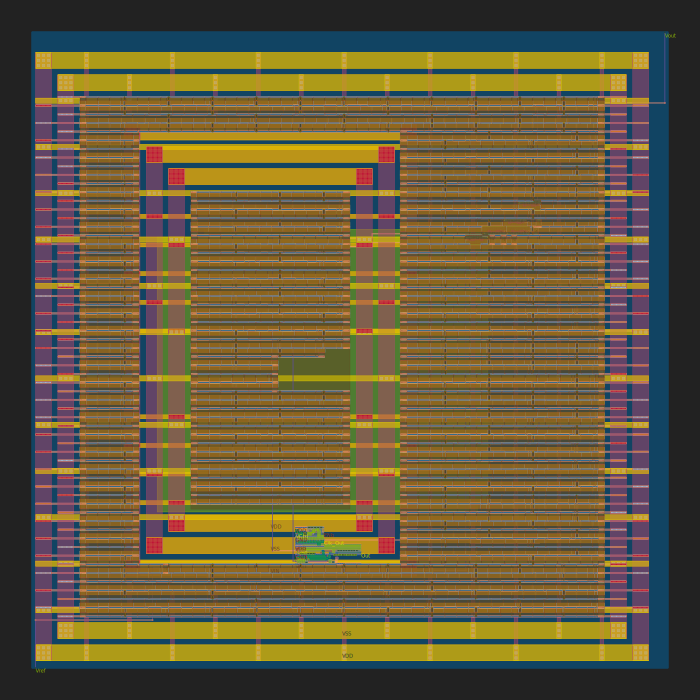

In [18]:
import gdstk
import IPython.display
import svgutils.transform as sg
!cp /content/OpenFASOC/openfasoc/generators/PLL-gen/flow/results/sky130hd/PLL/6_final.gds /content
flrpln = gdstk.read_gds("6_final.gds".format(PLL_ROOT))
flrpln_top_cell = flrpln.top_level()
flrpln_top_cell[0].write_svg('6_final.svg')
fig = sg.fromfile('6_final.svg')
fig.set_size(('700','700'))
fig.save('6_final.svg')
IPython.display.SVG('6_final.svg')